In [1]:
#Import Required Packages
import warnings
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cpo_df = pd.read_csv("data_set/PAL2MALY Index.csv" , low_memory = False)

In [3]:
cpo_df.head()

,Date,PAL2MALY Index_PX_LAST
0,03-01-05,1389.0
1,04-01-05,1368.0
2,05-01-05,1364.0
3,06-01-05,1368.0
4,07-01-05,1367.0


In [4]:
#Check Null Values
cpo_df.isnull().sum()

Date                      1045409
PAL2MALY Index_PX_LAST    1045409
dtype: int64

In [5]:
#Remove Null Values
cpo_df = cpo_df.dropna()

In [6]:
#Check Null Values again
cpo_df.isnull().sum()

Date                      0
PAL2MALY Index_PX_LAST    0
dtype: int64

# Time Series Prediction with Python Fbprophet package

In [7]:
# prophet model 
from fbprophet import Prophet
# prophet preformance
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [8]:
# column names for prophet compliance
cpo_df.columns = ['ds','y']

In [9]:
# convert dates from string to datetime
cpo_df.ds = pd.to_datetime(cpo_df.ds)

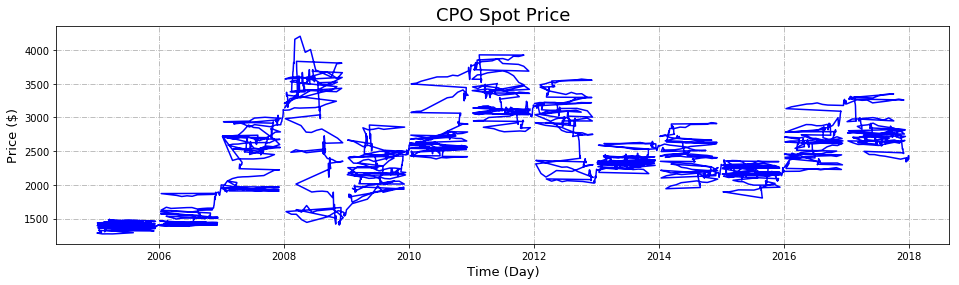

In [10]:
# frame up w/ grid
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(cpo_df.ds, cpo_df.y, 'b')

# set title & labels
plt.title('CPO Spot Price', fontsize=18)
plt.ylabel('Price ($)', fontsize=13)
plt.xlabel('Time (Day)', fontsize=13)

# display graph
plt.show()

In [11]:
#prophet = Prophet(changepoint_prior_scale=0.095, daily_seasonality= True , yearly_seasonality = True)

#Use with default settings
prophet = Prophet()

In [12]:
#fit the data into model
prophet.fit(cpo_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [13]:
#Make three months prediction
build_forecast = prophet.make_future_dataframe(periods=90, freq='D')
forecast = prophet.predict(build_forecast)

#inspect last few rows of predictoin
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,ds,yhat,yhat_lower,yhat_upper
3250,2018-03-25,3068.762397,2673.266968,3473.642682
3251,2018-03-26,3108.715968,2698.071083,3507.773187
3252,2018-03-27,3092.933071,2691.028592,3532.358830
3253,2018-03-28,3083.655364,2645.478270,3490.413367
3254,2018-03-29,3111.706164,2724.769436,3525.143966


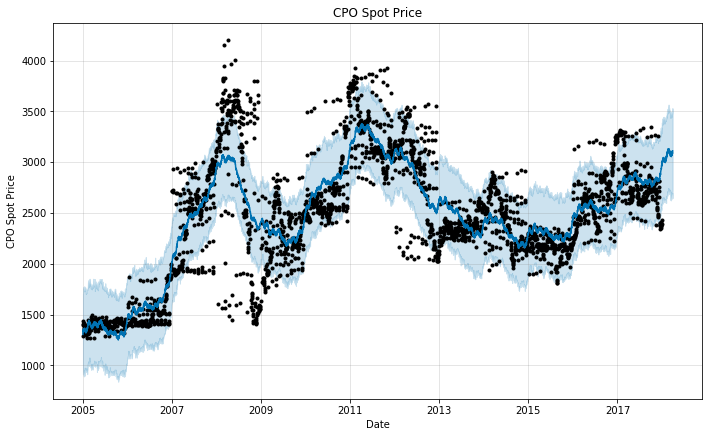

In [14]:
# plot forecasts
prophet.plot(forecast, xlabel='Date', ylabel='CPO Spot Price')
plt.title('CPO Spot Price')
# display graph
plt.show()

# <h> Let's view clearer on the predicted 90 days period </h>

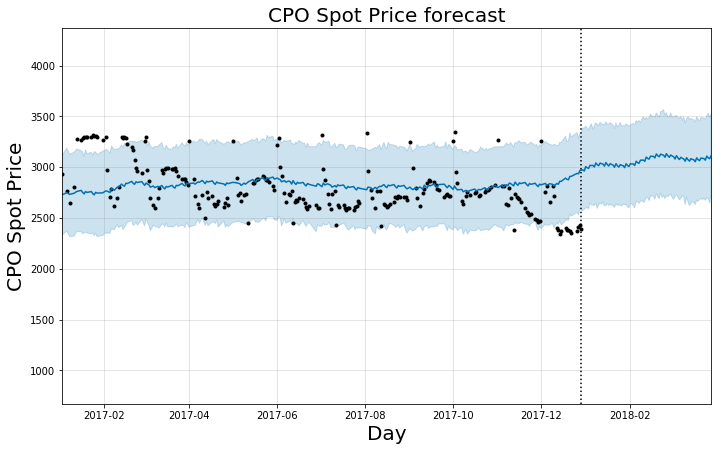

In [15]:
from datetime import datetime, timedelta
fig1 = prophet.plot(forecast)

datenow = datetime(2017, 12, 29)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)
plt.xlim([datestart, dateend])
plt.title("CPO Spot Price forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("CPO Spot Price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [16]:
#Data of the predicted 90 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-90:]

,ds,yhat,yhat_lower,yhat_upper
3165,2017-12-30,2974.196704,2573.262390,3387.752074
3166,2017-12-31,2962.024730,2583.784391,3385.214681
3167,2018-01-01,3006.186116,2595.904866,3403.523107
3168,2018-01-02,2994.045451,2604.292808,3387.549298
3169,2018-01-03,2987.840934,2588.330258,3364.799960
...,...,...,...,...
3250,2018-03-25,3068.762397,2673.266968,3473.642682
3251,2018-03-26,3108.715968,2698.071083,3507.773187
3252,2018-03-27,3092.933071,2691.028592,3532.358830
3253,2018-03-28,3083.655364,2645.478270,3490.413367


C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



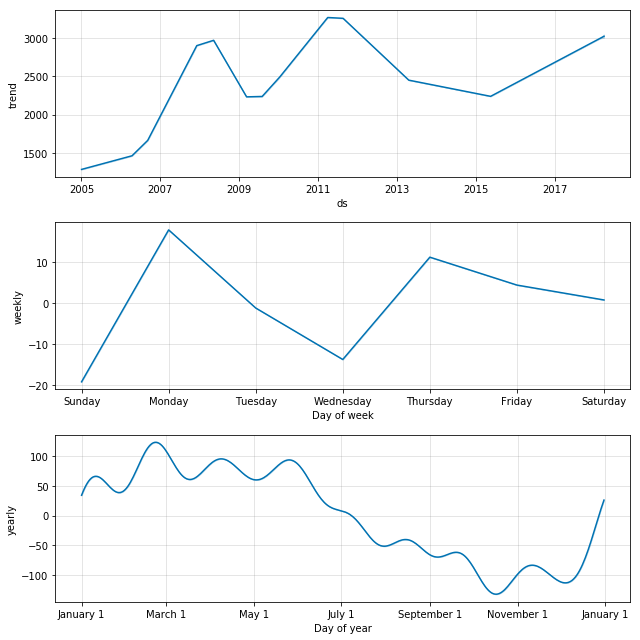

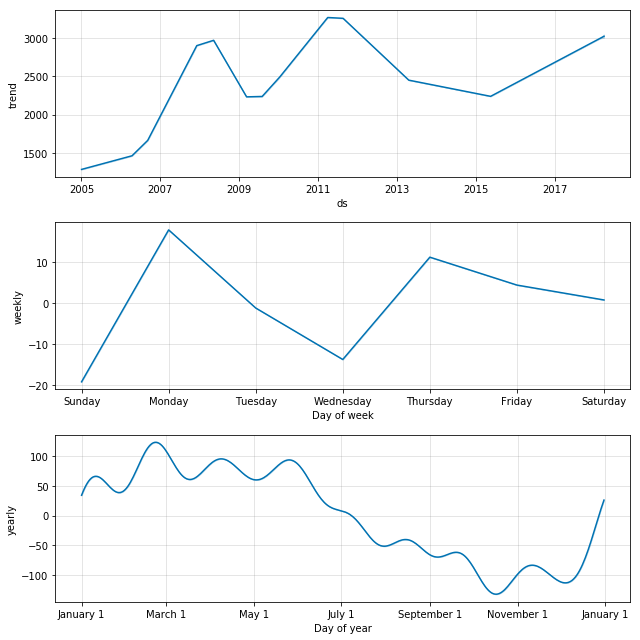

In [17]:
# Component of the forecast
prophet.plot_components(forecast)

# Evaluate Performance With Cross Validation


In [18]:
cpo_cv = cross_validation(prophet, initial='3165 days', period='45 days', horizon='90 days')

INFO:fbprophet:Making 34 forecasts with cutoffs between 2013-09-06 00:00:00 and 2017-09-30 00:00:00
C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

C:\Users\USER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [19]:
cpo_cv.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-09-07,2069.569645,1625.956857,2495.142530,2377.0,2013-09-06
1,2013-09-09,2080.757158,1654.406102,2510.111140,2428.0,2013-09-06
2,2013-09-10,2047.151085,1623.607849,2505.233445,2346.0,2013-09-06
3,2013-09-12,2059.781919,1639.066312,2503.769912,2628.0,2013-09-06
4,2013-09-13,2042.184409,1625.454231,2476.257042,2357.0,2013-09-06
5,2013-09-17,2017.582534,1589.710773,2434.049281,2342.0,2013-09-06
6,2013-09-18,2015.563907,1601.538387,2444.422771,2337.0,2013-09-06
7,2013-09-19,2035.685547,1595.089831,2482.870010,2316.0,2013-09-06
8,2013-09-20,2020.444237,1595.663187,2448.408953,2312.0,2013-09-06
9,2013-09-23,2031.330367,1580.409522,2451.296789,2302.0,2013-09-06


In [20]:
cpo_pm = performance_metrics(cpo_cv)

cpo_pm.tail(10)

,horizon,mse,rmse,mae,mape,coverage
72,81 days,158488.517377,398.106163,313.813179,0.118283,0.666667
73,82 days,161817.980634,402.266057,317.394703,0.120026,0.668767
74,83 days,160850.872291,401.062180,313.495538,0.118624,0.683168
75,84 days,152739.883769,390.819503,304.174272,0.115756,0.705652
76,85 days,146429.826552,382.661504,297.679558,0.114289,0.722574
77,86 days,141649.414134,376.363407,294.819751,0.113985,0.731597
78,87 days,141424.327706,376.064260,297.379408,0.115726,0.722322
79,88 days,142404.121801,377.364707,302.461854,0.118117,0.705563
80,89 days,141969.392849,376.788260,304.590968,0.119062,0.700495
81,90 days,140800.712221,375.234210,306.512137,0.119715,0.696196


From the above result the only figure that is important is <b>MAPE</b> and is around 11% (the lower the better)

# Add other data as extra regressor for this time series model prediction


According to the correlation anaylysis which done previously, BO1 Comdty_(CBOT Soybean Oil Future) , CO1 Comdty_(ICE Brent Crude Oil Future) and QS1 Comdty_(ICE Gas Oil Future) are top three higshest correlated features , we will try fit in to the model and inspect the performance again

# Add BO1 Comdty_(CBOT Soybean Oil Future) 

In [18]:
soybean_df = pd.read_csv("data_set/BO1 COMB Comdty.csv" , low_memory = False)

In [19]:
soybean_df.head()

,Date,BO1 COMB Comdty_PX_LAST
0,03-01-05,20.0
1,04-01-05,20.0
2,05-01-05,20.1
3,06-01-05,20.2
4,07-01-05,20.4


In [20]:
#Check Null Values
soybean_df.isnull().sum()

Date                       1045298
BO1 COMB Comdty_PX_LAST    1045298
dtype: int64

In [21]:
soybean_df.tail()

,Date,BO1 COMB Comdty_PX_LAST
1048569,NaN,NaN
1048570,NaN,NaN
1048571,NaN,NaN
1048572,NaN,NaN
1048573,NaN,NaN


In [22]:
#drop null values
soybean_df = soybean_df.dropna()

In [23]:
# convert dates from string to datetime
soybean_df.Date = pd.to_datetime(soybean_df.Date)

#min and max dat of soybean oil data
print(min(soybean_df.Date))
print(max(soybean_df.Date))

2005-01-02 00:00:00
2017-12-29 00:00:00


In [24]:
# Add column to the cpo_df
cpo_df['soybean'] = soybean_df['BO1 COMB Comdty_PX_LAST']

In [25]:
cpo_df.head()

,ds,y,soybean
0,2005-03-01,1389.0,20.0
1,2005-04-01,1368.0,20.0
2,2005-05-01,1364.0,20.1
3,2005-06-01,1368.0,20.2
4,2005-07-01,1367.0,20.4


# Add One Features to the Time Series Model

In [26]:
#Add extra regression to the model
prophet2 = Prophet()
prophet2.add_regressor('soybean')
prophet2.fit(cpo_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [27]:
build_forecast2 = prophet2.make_future_dataframe(periods=90, freq='D')
build_forecast2['soybean'] = soybean_df['BO1 COMB Comdty_PX_LAST']
forecast2 = prophet2.predict(build_forecast2)


forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,ds,yhat,yhat_lower,yhat_upper
3240,2018-03-15,3143.387622,2757.879341,3505.889802
3241,2018-03-16,3130.441898,2704.117508,3504.358040
3242,2018-03-17,3113.133985,2724.284128,3492.537849
3243,2018-03-18,3090.291202,2741.753080,3469.979183
3244,2018-03-19,3110.497854,2712.741200,3472.328375
3245,2018-03-20,3115.480603,2726.803033,3487.601245
3246,2018-03-21,3097.993992,2722.175279,3472.040590
3247,2018-03-22,3116.333180,2760.623999,3512.573909
3248,2018-03-23,3103.547433,2723.248692,3490.171916
3249,2018-03-24,3104.719875,2707.292292,3467.663065


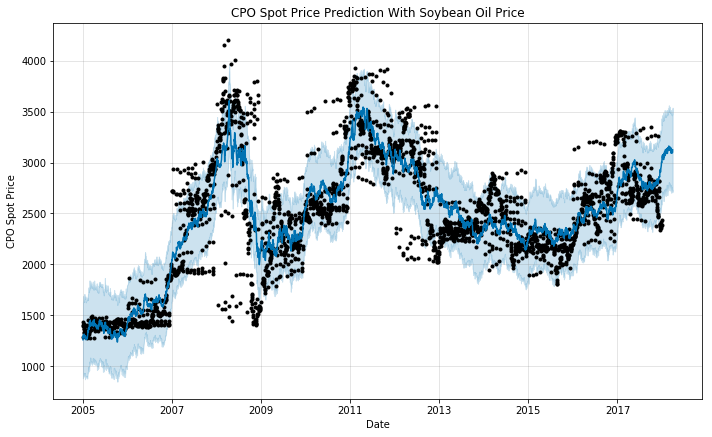

In [28]:
# plot forecasts with soybean
prophet2.plot(forecast2, xlabel='Date', ylabel='CPO Spot Price')
plt.title('CPO Spot Price Prediction With Soybean Oil Price')
# display graph
plt.show()

# <h> Let's view clearer on the predicted 90 days period </h>

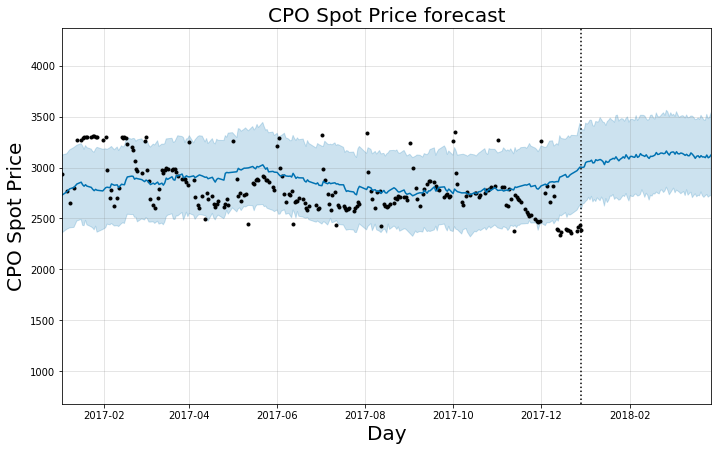

In [29]:
from datetime import datetime, timedelta
fig1 = prophet2.plot(forecast2)

datenow = datetime(2017, 12, 29)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)
plt.xlim([datestart, dateend])
plt.title("CPO Spot Price forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("CPO Spot Price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



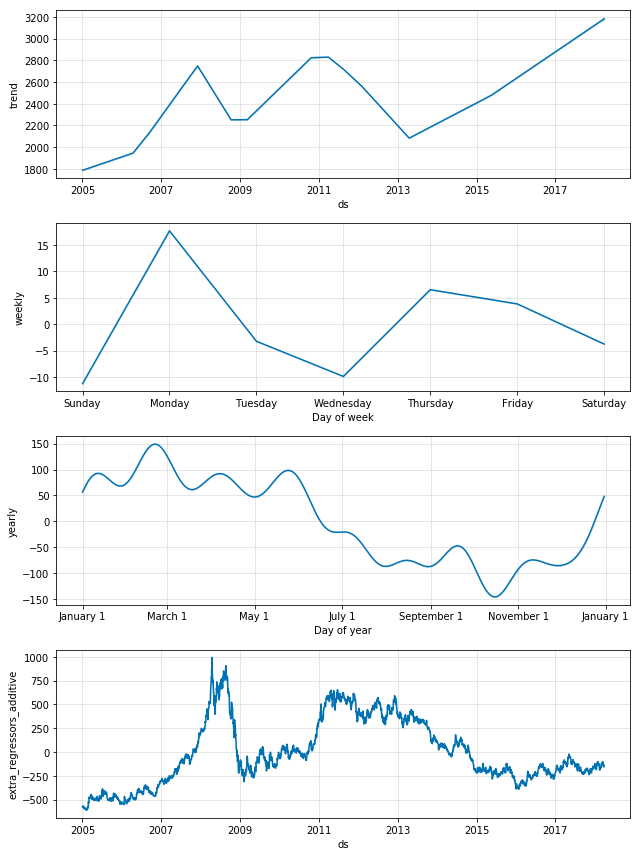

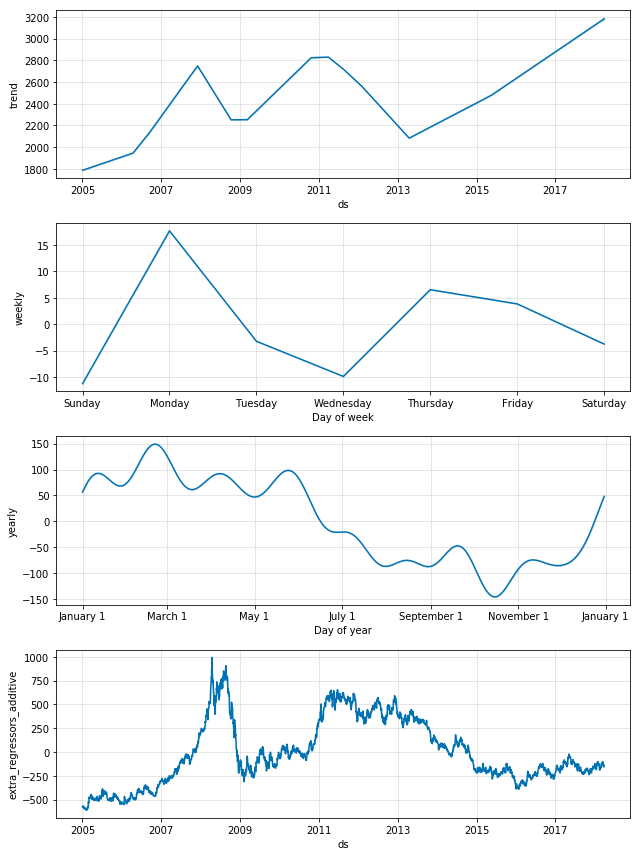

In [30]:
# Component of the forecast
prophet2.plot_components(forecast2)

In [31]:
#Test the performance using same cut off period as before
cpo_cv2 = cross_validation(prophet, initial='3165 days', period='45 days', horizon='90 days')

INFO:fbprophet:Making 34 forecasts with cutoffs between 2013-09-06 00:00:00 and 2017-09-30 00:00:00
C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [32]:
cpo_pm2 = performance_metrics(cpo_cv2)
cpo_pm2.tail(10)

,horizon,mse,rmse,mae,mape,coverage
72,81 days,158488.517377,398.106163,313.813179,0.118283,0.671617
73,82 days,161817.980634,402.266057,317.394703,0.120026,0.673717
74,83 days,160850.872291,401.062180,313.495538,0.118624,0.683168
75,84 days,152739.883769,390.819503,304.174272,0.115756,0.700701
76,85 days,146429.826552,382.661504,297.679558,0.114289,0.712673
77,86 days,141649.414134,376.363407,294.819751,0.113985,0.716746
78,87 days,141424.327706,376.064260,297.379408,0.115726,0.707471
79,88 days,142404.121801,377.364707,302.461854,0.118117,0.690712
80,89 days,141969.392849,376.788260,304.590968,0.119062,0.683168
81,90 days,140800.712221,375.234210,306.512137,0.119715,0.676394


From the above result the MAPE and is around 10% (lower than before!!)

# Adding more Features

Since MAP reduce after adding usefult features, lets try add CO1 Comdty_(ICE Brent Crude Oil Future) and QS1 Comdty_(ICE Gas Oil Future) together and observe the performance again

In [33]:
brent_crude_df = pd.read_csv("data_set/CO1 COMB Comdty.csv" , low_memory = False)
gas_oil_df = pd.read_csv("data_set/QS1 Comdty.csv" , low_memory = False)


In [34]:
#Inspect ICE Brent Crude Oil Future data
brent_crude_df.head()

,Date,CO1 COMB Comdty_PX_LAST
0,04-01-05,41.04
1,05-01-05,40.51
2,06-01-05,42.85
3,07-01-05,43.18
4,10-01-05,42.92


In [35]:
#Check Null Values
brent_crude_df.isnull().sum()

Date                       1045225
CO1 COMB Comdty_PX_LAST    1045225
dtype: int64

In [36]:
#Remove Null Values
brent_crude_df = brent_crude_df.dropna()

In [37]:
## convert dates from string to datetime
brent_crude_df.Date = pd.to_datetime(soybean_df.Date)

#min and max dat of soybean oil data
print(min(brent_crude_df.Date))
print(max(brent_crude_df.Date))

2005-01-02 00:00:00
2017-12-29 00:00:00


In [38]:
#Inspect ICE Gas Oil Future) data
gas_oil_df.head()

,Date,QS1 Comdty_PX_LAST
0,04-01-05,364.25
1,05-01-05,358.25
2,06-01-05,377.00
3,07-01-05,376.25
4,10-01-05,394.75


In [39]:
#Check Null Values
gas_oil_df.isnull().sum()

Date                  1045227
QS1 Comdty_PX_LAST    1045227
dtype: int64

In [40]:
#Remove Null Values
gas_oil_df = gas_oil_df.dropna()

In [41]:
## convert dates from string to datetime
gas_oil_df.Date = pd.to_datetime(gas_oil_df.Date)

#min and max dat of soybean oil data
print(min(gas_oil_df.Date))
print(max(gas_oil_df.Date))

2005-01-02 00:00:00
2017-12-29 00:00:00


# Add All Three Selected Features to the Time Series Model

In [42]:
#Inspect the original CPO price data frame
cpo_df.head()

,ds,y,soybean
0,2005-03-01,1389.0,20.0
1,2005-04-01,1368.0,20.0
2,2005-05-01,1364.0,20.1
3,2005-06-01,1368.0,20.2
4,2005-07-01,1367.0,20.4


In [43]:
#Add two more features in this data frame
cpo_df['brent_crude'] = brent_crude_df['CO1 COMB Comdty_PX_LAST']
cpo_df['gas_oil'] = gas_oil_df['QS1 Comdty_PX_LAST']

In [44]:
#Add extra regression to the model
prophet3 = Prophet()
prophet3.add_regressor('soybean')
prophet3.add_regressor('brent_crude')
prophet3.add_regressor('gas_oil')
prophet3.fit(cpo_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [45]:
#Build the Forcecast with two added features
build_forecast3 = prophet3.make_future_dataframe(periods=90, freq='D')

build_forecast3['soybean'] =  soybean_df['BO1 COMB Comdty_PX_LAST']
build_forecast3['brent_crude'] =  brent_crude_df['CO1 COMB Comdty_PX_LAST']
build_forecast3['gas_oil'] =  gas_oil_df['QS1 Comdty_PX_LAST']
forecast3 = prophet.predict(build_forecast3)


forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



,ds,yhat,yhat_lower,yhat_upper
3240,2018-03-15,3083.771868,2713.181828,3459.497006
3241,2018-03-16,3076.729835,2689.662593,3450.601989
3242,2018-03-17,3073.299350,2698.270081,3494.349498
3243,2018-03-18,3054.067545,2698.598709,3480.537199
3244,2018-03-19,3092.005803,2694.693668,3513.763805
3245,2018-03-20,3074.516391,2658.292611,3476.709229
3246,2018-03-21,3063.862119,2676.916992,3489.197296
3247,2018-03-22,3090.880485,2694.230946,3474.770324
3248,2018-03-23,3086.586255,2673.315137,3475.328567
3249,2018-03-24,3085.698093,2661.448081,3492.010768


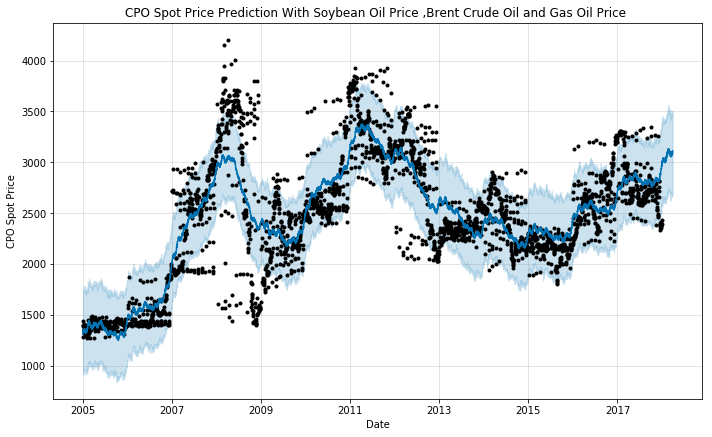

In [46]:
# plot forecasts with soybean
prophet3.plot(forecast3, xlabel='Date', ylabel='CPO Spot Price')
plt.title('CPO Spot Price Prediction With Soybean Oil Price ,Brent Crude Oil and Gas Oil Price ')
# display graph
plt.show()

# <h> Let's view clearer on the predicted 90 days period </h>

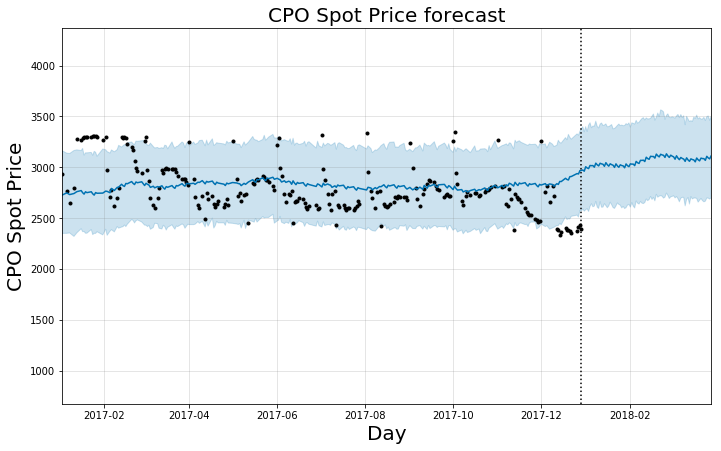

In [47]:
from datetime import datetime, timedelta
fig1 = prophet3.plot(forecast3)

datenow = datetime(2017, 12, 29)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)
plt.xlim([datestart, dateend])
plt.title("CPO Spot Price forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("CPO Spot Price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

C:\Users\USER\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



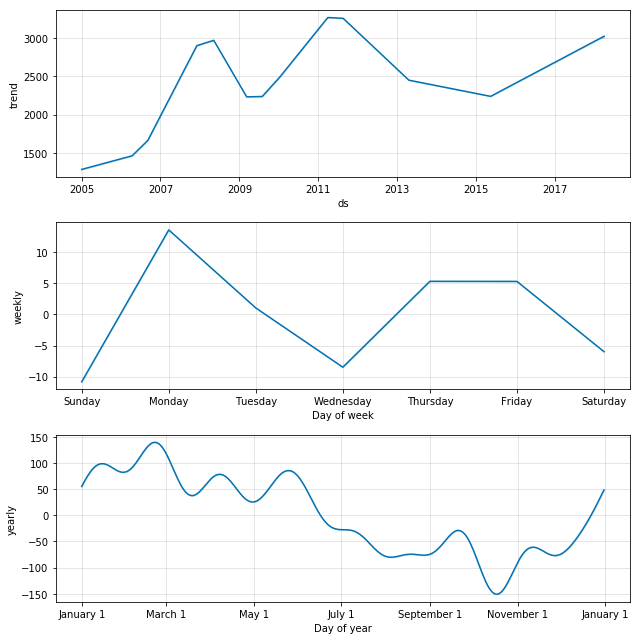

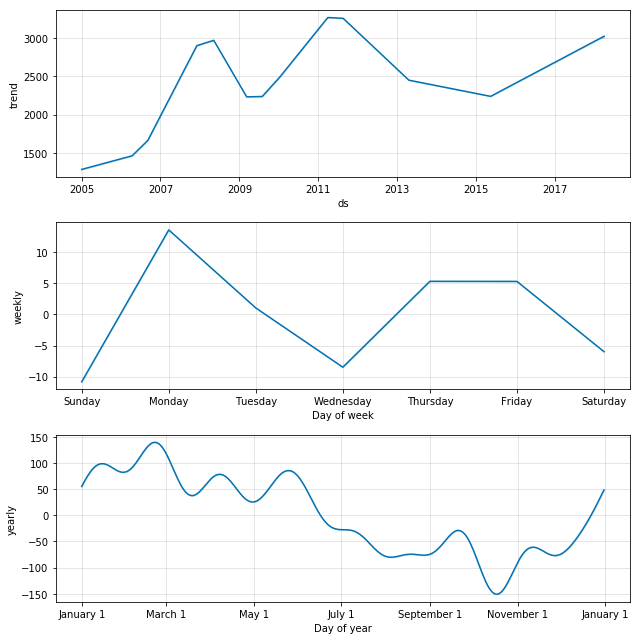

In [48]:
# Component of the forecast
prophet3.plot_components(forecast3)

In [51]:
#Test the performance using same cut off period as before
cpo_cv3 = cross_validation(prophet, initial='3165 days', period='45 days', horizon='90 days')

INFO:fbprophet:Making 34 forecasts with cutoffs between 2013-09-06 00:00:00 and 2017-09-30 00:00:00
C:\Users\USER\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [52]:
cpo_pm3 = performance_metrics(cpo_cv3)
cpo_pm3.tail(10)

,horizon,mse,rmse,mae,mape,mdape,coverage
72,81 days,167810.929691,409.647324,324.117359,0.126823,0.108055,0.664191
73,82 days,171958.992438,414.679385,326.610443,0.128053,0.109209,0.653915
74,83 days,171757.778265,414.436700,325.108113,0.128164,0.108159,0.648515
75,84 days,164555.712907,405.654672,315.202116,0.125654,0.100942,0.651609
76,85 days,162948.332612,403.668593,309.885358,0.124766,0.094424,0.654851
77,86 days,157803.549329,397.244949,306.276263,0.124275,0.103798,0.672191
78,87 days,162990.037438,403.720247,313.683499,0.128337,0.108159,0.659766
79,88 days,170186.186465,412.536285,322.774759,0.132539,0.115086,0.652994
80,89 days,173027.625745,415.965895,327.783947,0.134640,0.115229,0.658416
81,90 days,167938.343406,409.802810,323.562350,0.132871,0.112254,0.674310


From the above result the MAPE and is abit higher for 90 days, however ofr 85 days it able to achieve 9%, oveall adding more features does not really increase performance significantly

# Save Best Model to Pickle Files

In [49]:
# Since second model give best performance fro 90 days (3 months) we will save second model to pickle file 
import joblib
filename = 'time_series.sav'
joblib.dump(prophet2, filename)

['C:\\Users\\USER\\Documents\\Kenangan_Investment\\Data Scientist Assignment\\time_series.sav']